In [26]:
import pandas as pd
import datetime

# 기본데이터정제

In [29]:
df = pd.read_excel("maindata/01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_시청률 데이터.xlsx")
data = df.T
data_org = data.copy()

In [33]:
df

,Unnamed: 0,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003
1,02:01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.003
2,02:02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004
3,02:03,0.000,0.000,0.014,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
4,02:04,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,01:56,0.000,0.000,0.000,0.000,0.027,0.000,0.000,0.000,0.000,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004
1437,01:57,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004
1438,01:58,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.013,0.017,0.000,0.000,0.015,0.000,0.000,0.019,0.000,0.004
1439,01:59,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004


In [4]:
# 기본데이터 정제
data_org = data_org.iloc[:,-1:].reset_index()
data = data.iloc[:-1, :-1]
data = data.reset_index()

In [11]:
data_org

날짜,index,월화수목금토일02:00-01:59
0,2019-01-01,0.004
1,2019-01-02,0.006
2,2019-01-03,0.002
3,2019-01-04,0.003
4,2019-01-05,0.002
...,...,...
361,2019-12-28,0.006
362,2019-12-29,0.004
363,2019-12-30,0.005
364,2019-12-31,0.005


In [5]:
# d3
d1 = pd.melt(data, id_vars=['index'], var_name='time', value_name='rate').copy()
d1 = d1.rename(columns = {"index":"date"})
d1["hour"] = [i[0:2] for i in d1["time"]]
d2 = d1.groupby(["date", 'hour'])["rate"].max().reset_index()
d3 = d2.groupby('date').mean().copy().reset_index()
d3["data_org"] = data_org.iloc[:,-1:]

In [9]:
d2

,date,hour,rate
0,2019-01-01,00,0.012
1,2019-01-01,01,0.034
2,2019-01-01,02,0.014
3,2019-01-01,03,0.014
4,2019-01-01,04,0.014
...,...,...,...
8755,2019-12-31,19,0.033
8756,2019-12-31,20,0.018
8757,2019-12-31,21,0.028
8758,2019-12-31,22,0.108


In [10]:
d3

,date,rate,data_org
0,2019-01-01,0.024375,0.004
1,2019-01-02,0.031333,0.006
2,2019-01-03,0.026083,0.002
3,2019-01-04,0.023958,0.003
4,2019-01-05,0.020750,0.002
...,...,...,...
360,2019-12-27,0.027417,0.004
361,2019-12-28,0.036958,0.006
362,2019-12-29,0.037667,0.004
363,2019-12-30,0.029500,0.005


In [6]:
#d3_1
d2_1 = d1.groupby(["date", 'hour'])["rate"].mean().reset_index()
d3_1 = d2_1.groupby('date').mean().copy().reset_index()
d3_1["data_org"] = data_org.iloc[:,-1:]

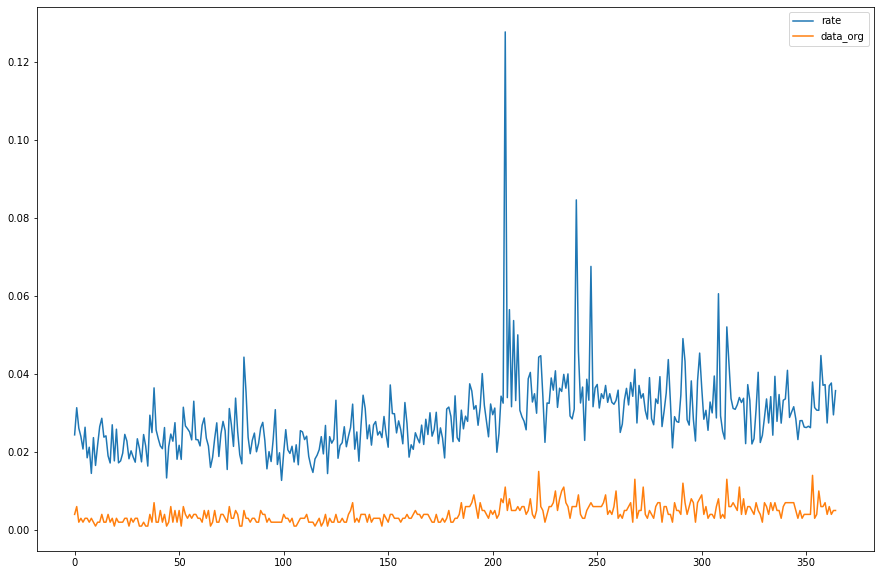

In [7]:
import matplotlib.pyplot as plt
#plt.figure()
d3.plot(figsize=(15,10))

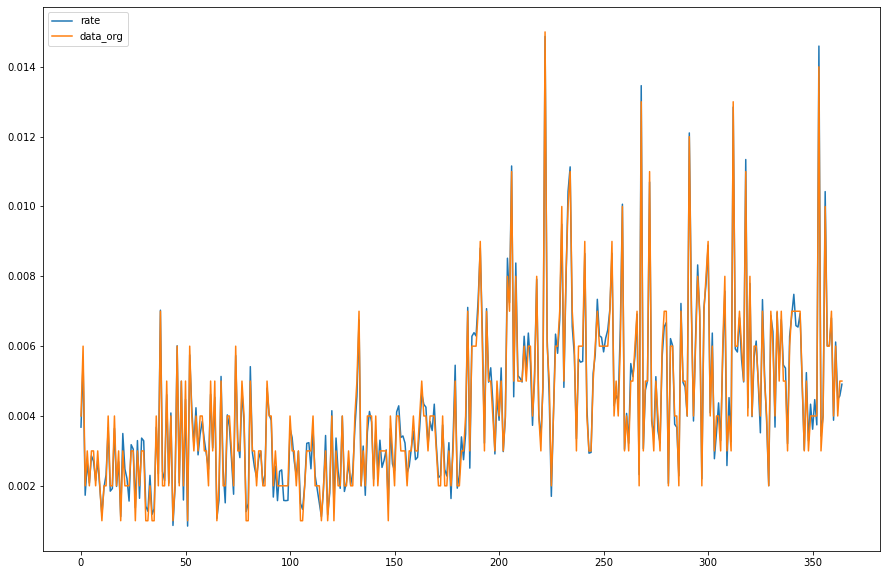

In [8]:
d3_1.plot(figsize=(15,10))

In [8]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8760 non-null   object 
 1   hour    8760 non-null   object 
 2   rate    8760 non-null   float64
dtypes: float64(1), object(2)
memory usage: 205.4+ KB


In [9]:
d2_org = d2.copy()
d2["date"] = pd.to_datetime(d2["date"], format = "%Y-%m-%d", errors='raise')
d2

,date,hour,rate
0,2019-01-01,00,0.012
1,2019-01-01,01,0.034
2,2019-01-01,02,0.014
3,2019-01-01,03,0.014
4,2019-01-01,04,0.014
...,...,...,...
8755,2019-12-31,19,0.033
8756,2019-12-31,20,0.018
8757,2019-12-31,21,0.028
8758,2019-12-31,22,0.108


In [10]:
d2["weekday"] = d2["date"].dt.weekday

In [11]:
weekday = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
d2["weekday"] = d2["weekday"].apply(lambda x: weekday[x])

In [12]:
d2

,date,hour,rate,weekday
0,2019-01-01,00,0.012,화
1,2019-01-01,01,0.034,화
2,2019-01-01,02,0.014,화
3,2019-01-01,03,0.014,화
4,2019-01-01,04,0.014,화
...,...,...,...,...
8755,2019-12-31,19,0.033,화
8756,2019-12-31,20,0.018,화
8757,2019-12-31,21,0.028,화
8758,2019-12-31,22,0.108,화


# 시청률 데이터 - count

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [31]:
df = pd.read_excel("maindata/01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_시청률 데이터.xlsx", index_col=[0])

In [32]:
view = df.T
view.reset_index(inplace=True)
view = view.iloc[:-1, :-1]
view

,index,02:00,02:01,02:02,02:03,02:04,02:05,02:06,02:07,02:08,...,01:50,01:51,01:52,01:53,01:54,01:55,01:56,01:57,01:58,01:59
0,2019-01-01,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2019-01-02,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2019-01-03,0.0,0.000,0.0,0.014,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,2019-01-04,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2019-01-05,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.027,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015
361,2019-12-28,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
362,2019-12-29,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
363,2019-12-30,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.019,0.000


In [33]:
v1 = pd.melt(view, id_vars=["index"], var_name = "time", value_name= 'rate')
v1 = v1.rename(columns = {"index":"date"})
v1["hour"] = [i[0:2] for i in v1["time"]]

In [34]:
v1 = v1.replace(0, np.NaN)

In [35]:
v1_count = v1.groupby(['date','hour'])["rate"].count().reset_index()

In [36]:
v1_count

,date,hour,rate
0,2019-01-01,00,10
1,2019-01-01,01,2
2,2019-01-01,02,1
3,2019-01-01,03,20
4,2019-01-01,04,60
...,...,...,...
8755,2019-12-31,19,11
8756,2019-12-31,20,4
8757,2019-12-31,21,4
8758,2019-12-31,22,37


In [37]:
v1_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    8760 non-null   object
 1   hour    8760 non-null   object
 2   rate    8760 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 205.4+ KB


In [38]:
v1_count["date"] = pd.to_datetime(v1_count["date"], format = "%Y-%m-%d", errors='raise')
v1_count["weekday"] = v1_count["date"].dt.weekday
weekday = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
v1_count["weekday"] = v1_count["weekday"].apply(lambda x: weekday[x])
v1_count

,date,hour,rate,weekday
0,2019-01-01,00,10,화
1,2019-01-01,01,2,화
2,2019-01-01,02,1,화
3,2019-01-01,03,20,화
4,2019-01-01,04,60,화
...,...,...,...,...
8755,2019-12-31,19,11,화
8756,2019-12-31,20,4,화
8757,2019-12-31,21,4,화
8758,2019-12-31,22,37,화


# 날씨데이터 정체 - 비, 눈 1, 2

In [13]:
weather = pd.read_csv('data/2019_weather.csv', encoding = "cp949")
weather

,지점,지점명,일시,최저기온(°C),최고기온(°C),일강수량(mm),일 최심신적설(cm)
0,108,서울,2019-01-01,-8.2,-0.6,NaN,NaN
1,108,서울,2019-01-02,-8.8,0.2,NaN,NaN
2,108,서울,2019-01-03,-8.4,3.2,NaN,NaN
3,108,서울,2019-01-04,-6.2,4.1,NaN,NaN
4,108,서울,2019-01-05,-5.5,1.1,NaN,NaN
...,...,...,...,...,...,...,...
360,108,서울,2019-12-27,-4.6,2.6,NaN,NaN
361,108,서울,2019-12-28,-3.6,6.1,NaN,NaN
362,108,서울,2019-12-29,1.1,6.2,1.4,NaN
363,108,서울,2019-12-30,-5.7,6.8,0.4,NaN


In [14]:
rain = []
for i in weather['일강수량(mm)']:
    if i > 0:
        rain.append(1)
    else:
        rain.append(0)
        
snow = []
for i in weather['일 최심신적설(cm)']:
    if i > 0:
        snow.append(1)
    else:
        snow.append(0)

In [15]:
weather["rain"] = rain
weather['snow'] = snow

In [16]:
weather

,지점,지점명,일시,최저기온(°C),최고기온(°C),일강수량(mm),일 최심신적설(cm),rain,snow
0,108,서울,2019-01-01,-8.2,-0.6,NaN,NaN,0,0
1,108,서울,2019-01-02,-8.8,0.2,NaN,NaN,0,0
2,108,서울,2019-01-03,-8.4,3.2,NaN,NaN,0,0
3,108,서울,2019-01-04,-6.2,4.1,NaN,NaN,0,0
4,108,서울,2019-01-05,-5.5,1.1,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...
360,108,서울,2019-12-27,-4.6,2.6,NaN,NaN,0,0
361,108,서울,2019-12-28,-3.6,6.1,NaN,NaN,0,0
362,108,서울,2019-12-29,1.1,6.2,1.4,NaN,1,0
363,108,서울,2019-12-30,-5.7,6.8,0.4,NaN,1,0


In [17]:
weather.columns

Index(['지점', '지점명', '일시', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '일 최심신적설(cm)',
       'rain', 'snow'],
      dtype='object')

In [18]:
w = weather[["일시",'최저기온(°C)', '최고기온(°C)','rain', 'snow']]

In [19]:
w = w.rename(columns = {'일시':'date'})
w["date"] = pd.to_datetime(w['date'], format = "%Y-%m-%d")
w

,date,최저기온(°C),최고기온(°C),rain,snow
0,2019-01-01,-8.2,-0.6,0,0
1,2019-01-02,-8.8,0.2,0,0
2,2019-01-03,-8.4,3.2,0,0
3,2019-01-04,-6.2,4.1,0,0
4,2019-01-05,-5.5,1.1,0,0
...,...,...,...,...,...
360,2019-12-27,-4.6,2.6,0,0
361,2019-12-28,-3.6,6.1,0,0
362,2019-12-29,1.1,6.2,1,0
363,2019-12-30,-5.7,6.8,1,0


## count - w 같이같아

In [39]:
data1 = pd.merge(v1_count, w,how = "left", left_on = 'date', right_on = "date")

In [40]:
data1

,date,hour,rate,weekday,최저기온(°C),최고기온(°C),rain,snow
0,2019-01-01,00,10,화,-8.2,-0.6,0,0
1,2019-01-01,01,2,화,-8.2,-0.6,0,0
2,2019-01-01,02,1,화,-8.2,-0.6,0,0
3,2019-01-01,03,20,화,-8.2,-0.6,0,0
4,2019-01-01,04,60,화,-8.2,-0.6,0,0
...,...,...,...,...,...,...,...,...
8755,2019-12-31,19,11,화,-10.9,-4.5,0,0
8756,2019-12-31,20,4,화,-10.9,-4.5,0,0
8757,2019-12-31,21,4,화,-10.9,-4.5,0,0
8758,2019-12-31,22,37,화,-10.9,-4.5,0,0


In [41]:
data1 = data1.rename(columns ={'최저기온(°C)':"min_c", '최고기온(°C)':"max_c" })
data1['month'] = data1["date"].dt.month
data1 = data1[['date','month','hour', 'rate', 'weekday', 'min_c', 'max_c', 'rain', 'snow']]

In [42]:
data1

,date,month,hour,rate,weekday,min_c,max_c,rain,snow
0,2019-01-01,1,00,10,화,-8.2,-0.6,0,0
1,2019-01-01,1,01,2,화,-8.2,-0.6,0,0
2,2019-01-01,1,02,1,화,-8.2,-0.6,0,0
3,2019-01-01,1,03,20,화,-8.2,-0.6,0,0
4,2019-01-01,1,04,60,화,-8.2,-0.6,0,0
...,...,...,...,...,...,...,...,...,...
8755,2019-12-31,12,19,11,화,-10.9,-4.5,0,0
8756,2019-12-31,12,20,4,화,-10.9,-4.5,0,0
8757,2019-12-31,12,21,4,화,-10.9,-4.5,0,0
8758,2019-12-31,12,22,37,화,-10.9,-4.5,0,0


In [43]:
data1.to_csv("data/rate_count.csv",  encoding = "cp949")

# 위의 rate_mean()이랑 W데이터 합친것

In [22]:
data1 = pd.merge(d2, w,how = "left", left_on = 'date', right_on = "date")
data1

,date,hour,rate,weekday,최저기온(°C),최고기온(°C),rain,snow
0,2019-01-01,00,0.012,화,-8.2,-0.6,0,0
1,2019-01-01,01,0.034,화,-8.2,-0.6,0,0
2,2019-01-01,02,0.014,화,-8.2,-0.6,0,0
3,2019-01-01,03,0.014,화,-8.2,-0.6,0,0
4,2019-01-01,04,0.014,화,-8.2,-0.6,0,0
...,...,...,...,...,...,...,...,...
8755,2019-12-31,19,0.033,화,-10.9,-4.5,0,0
8756,2019-12-31,20,0.018,화,-10.9,-4.5,0,0
8757,2019-12-31,21,0.028,화,-10.9,-4.5,0,0
8758,2019-12-31,22,0.108,화,-10.9,-4.5,0,0


In [26]:
data1 = data1.rename(columns ={'최저기온(°C)':"min_c", '최고기온(°C)':"max_c" })

In [27]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     8760 non-null   datetime64[ns]
 1   hour     8760 non-null   object        
 2   rate     8760 non-null   float64       
 3   weekday  8760 non-null   object        
 4   min_c    8760 non-null   float64       
 5   max_c    8760 non-null   float64       
 6   rain     8760 non-null   int64         
 7   snow     8760 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 615.9+ KB


In [28]:
data1['month'] = data1["date"].dt.month

In [31]:
data1 = data1[['date','month','hour', 'rate', 'weekday', 'min_c', 'max_c', 'rain', 'snow']]

In [34]:
df

,Unnamed: 0,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003
1,02:01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.003
2,02:02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004
3,02:03,0.000,0.000,0.014,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
4,02:04,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,01:56,0.000,0.000,0.000,0.000,0.027,0.000,0.000,0.000,0.000,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004
1437,01:57,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004
1438,01:58,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.013,0.017,0.000,0.000,0.015,0.000,0.000,0.019,0.000,0.004
1439,01:59,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004


In [35]:
df = pd.read_excel("maindata/01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_시청률 데이터.xlsx", index_col=[0])
df

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
02:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003
02:01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.003
02:02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004
02:03,0.000,0.000,0.014,0.000,0.000,0.000,0.000,0.000,0.000,0.005,...,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
02:04,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,...,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:56,0.000,0.000,0.000,0.000,0.027,0.000,0.000,0.000,0.000,0.000,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004
01:57,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004
01:58,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,...,0.013,0.017,0.000,0.000,0.015,0.000,0.000,0.019,0.000,0.004
01:59,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004


In [69]:
dft = df.T

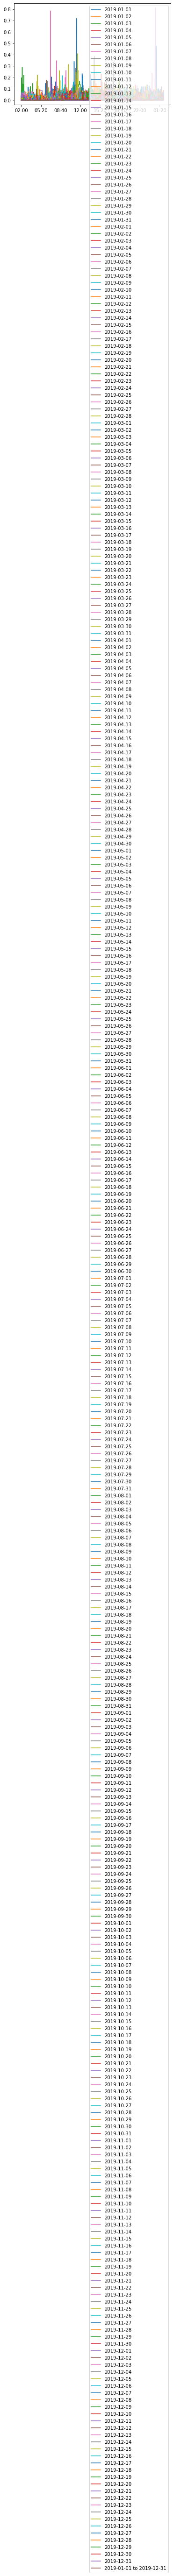

In [36]:
df.plot()

In [58]:
t1_1 = df.iloc[:,1]
t1_1

02:00                 0.000
02:01                 0.000
02:02                 0.000
02:03                 0.000
02:04                 0.000
                      ...  
01:56                 0.000
01:57                 0.000
01:58                 0.000
01:59                 0.000
월화수목금토일02:00-01:59    0.006
Name: 2019-01-02, Length: 1441, dtype: float64

In [59]:
t1_17 = df.iloc[:,8]

In [66]:
t1_2 = df.iloc[:,151]
t1_27 = df.iloc[:,158]

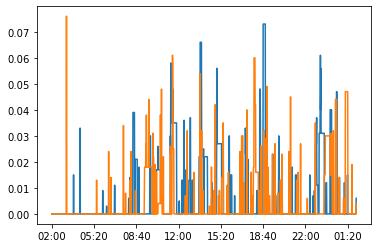

In [61]:
t1_1.plot()
t1_2.plot()
plt.show()

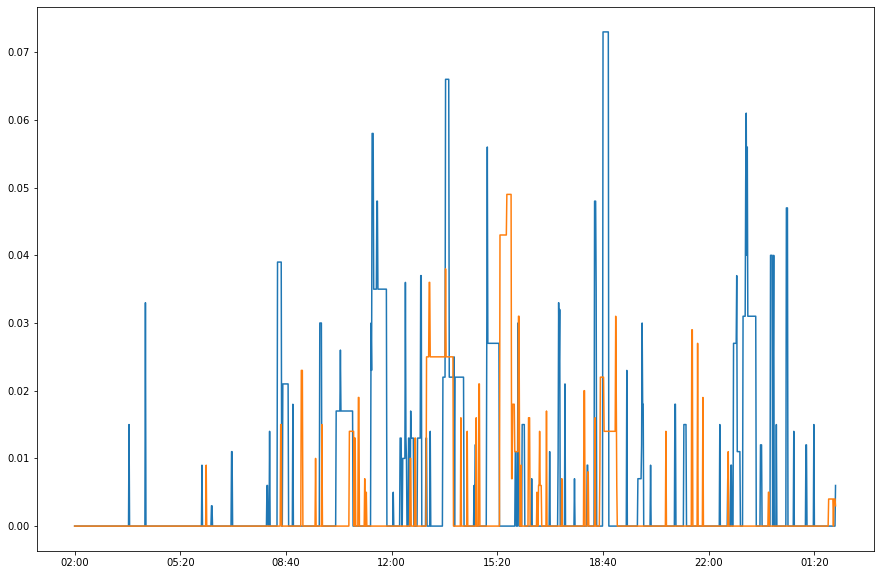

In [64]:
t1_1.plot(figsize=(15,10))
t1_17.plot(figsize=(15,10))

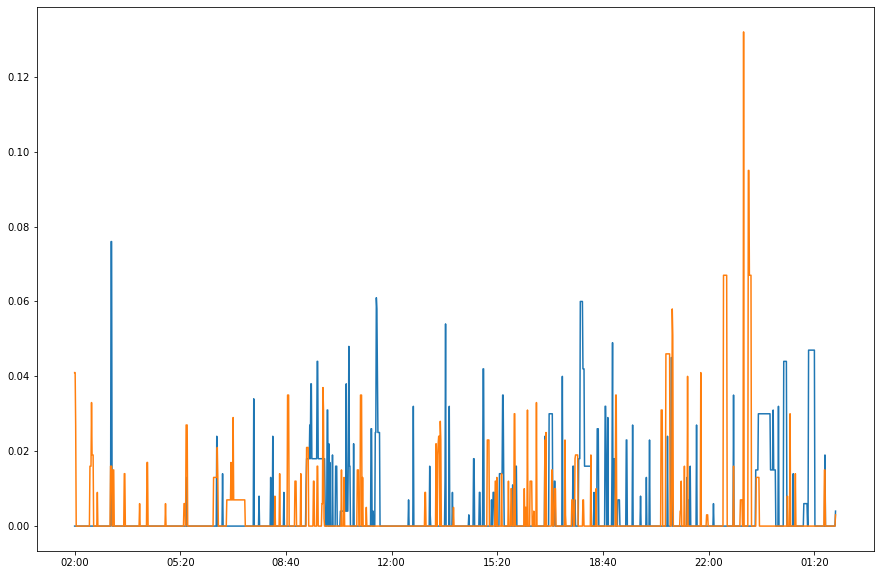

In [67]:
t1_2.plot(figsize=(15,10))
t1_27.plot(figsize=(15,10))

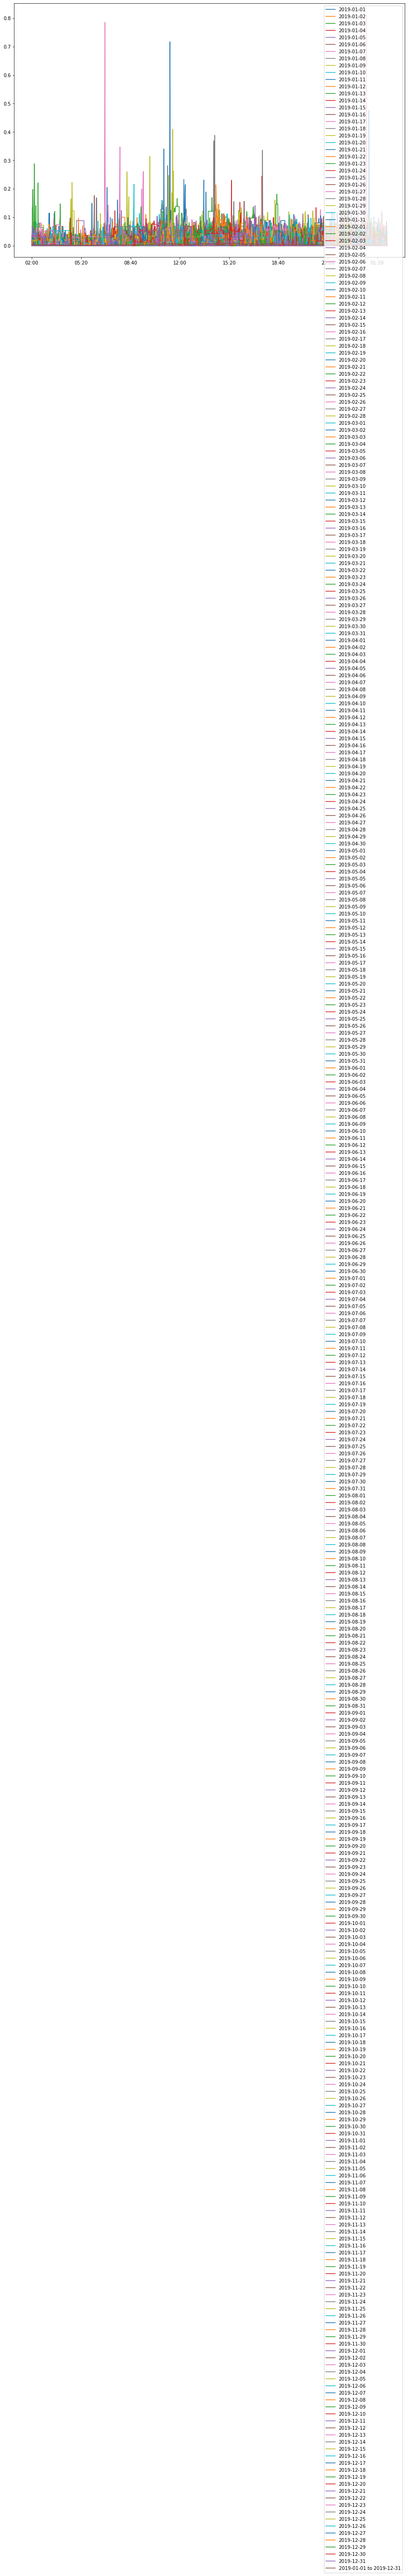

In [68]:
df.plot(figsize=(15,10))

In [77]:
df1 = pd.melt(dft, id_vars=['index'], var_name='time', value_name='rate').copy()

In [76]:
dft = dft.reset_index()

In [78]:
df1

,index,time,rate
0,2019-01-01,02:00,0.000
1,2019-01-02,02:00,0.000
2,2019-01-03,02:00,0.000
3,2019-01-04,02:00,0.000
4,2019-01-05,02:00,0.000
...,...,...,...
527401,2019-12-28,월화수목금토일02:00-01:59,0.006
527402,2019-12-29,월화수목금토일02:00-01:59,0.004
527403,2019-12-30,월화수목금토일02:00-01:59,0.005
527404,2019-12-31,월화수목금토일02:00-01:59,0.005


In [79]:
df1[df1["rate"] > 0.7]

,index,time,rate
108542,2019-07-26,06:56,0.785
205200,2019-08-29,11:20,0.717
496502,2019-07-26,00:36,0.812


In [80]:
df1[df1["rate"] > 0.3]

,index,time,rate
108176,2019-07-26,06:55,0.347
108542,2019-07-26,06:56,0.785
130868,2019-07-26,07:57,0.347
175256,2019-11-05,09:58,0.314
196050,2019-08-29,10:55,0.340
204834,2019-08-29,11:19,0.441
205200,2019-08-29,11:20,0.717
209294,2019-11-05,11:31,0.409
269989,2019-09-05,14:17,0.369
270355,2019-09-05,14:18,0.332
